In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [138]:
df = pd.read_csv('Absenteeism_at_work_Project.csv')
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,"239,554",...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,"239,554",...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,"239,554",...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,"239,554",...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,"239,554",...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [139]:
list(df)

['ID',
 'Reason for absence',
 'Month of absence',
 'Day of the week',
 'Seasons',
 'Transportation expense',
 'Distance from Residence to Work',
 'Service time',
 'Age',
 'Work load Average/day ',
 'Hit target',
 'Disciplinary failure',
 'Education',
 'Son',
 'Social drinker',
 'Social smoker',
 'Pet',
 'Weight',
 'Height',
 'Body mass index',
 'Absenteeism time in hours']

In [140]:
df = df.drop(columns='Work load Average/day ')#cannot convert from obj
print(df.shape[1]) # Number of Variables
print(df.shape[0]) # Number of datapoints

20
740


## Choose one to two categorical variables and three to four continuous
 * Outcome variable: Absenteeism 
 * Categorical
     1. 'Disciplanary failure'
     2. 'Social drinker'
     3. 'Social smoker'
     4. 'Education'
 * Continuous
     1. 'Transportation expense'
     2. 'Age'
     3. 'Son'(number of children)
     4. 'Distance from residence to work
     5. 'Service Time'
     6. 'Hit target'
     7. 'Pet'

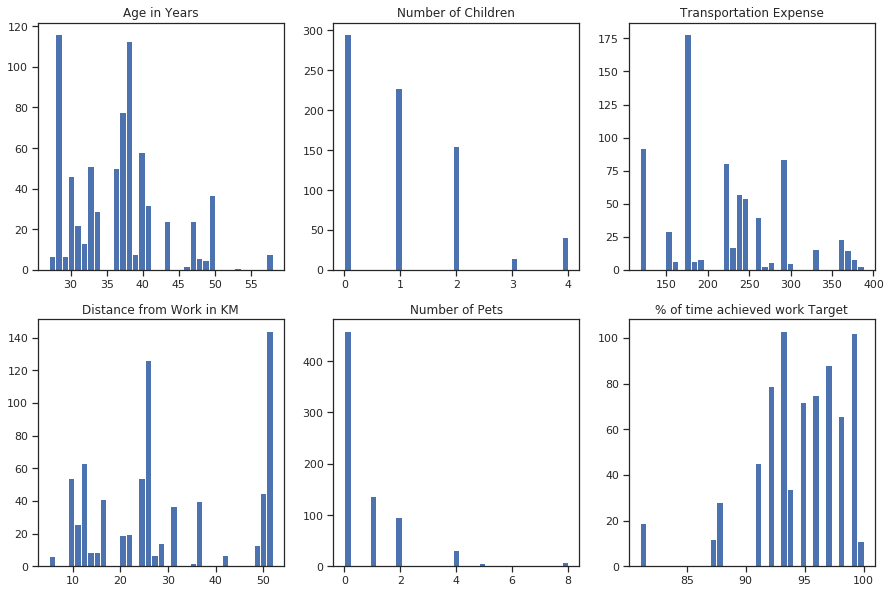

In [141]:
#Univariate Analysis

fig = plt.figure(figsize=(15,10))


fig.add_subplot(231)
plt.hist(df['Age'].dropna(), bins=35)
plt.title('Age in Years')

fig.add_subplot(232)
plt.hist(df['Son'].dropna(), bins=35)
plt.title("Number of Children")

fig.add_subplot(233)
plt.hist(df['Transportation expense'].dropna(),bins=35)
plt.title("Transportation Expense")

fig.add_subplot(234)
plt.hist(df['Distance from Residence to Work'].dropna(),bins=35)
plt.title("Distance from Work in KM")

fig.add_subplot(235)
plt.hist(df['Pet'].dropna(),bins=35)
plt.title("Number of Pets")

fig.add_subplot(236)
plt.hist(df['Hit target'].dropna(),bins=35)
plt.title('% of time achieved work Target')



plt.show()

/root/.pyenv/versions/jupyter3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


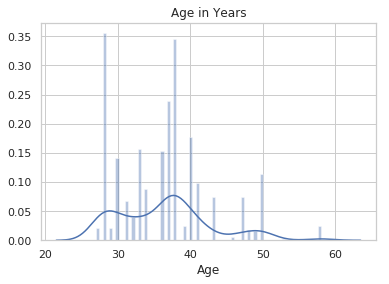

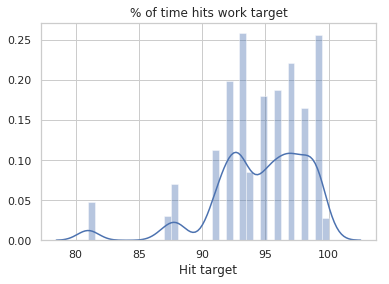

In [142]:
sns.set_style('whitegrid')

g = sns.distplot(df['Age'].dropna(),bins=70)
plt.title("Age in Years")
plt.show()

g = sns.distplot(df['Hit target'].dropna(), bins=35)
plt.title('% of time hits work target')
plt.show()


Some initial visualizations give insight to the distribution of the data.
While none of the data is 'normal', Age in Years appears to have clusters of workers around 30 yers, 40 years and 50 years.
Transportation expense and Distance from work in KM seem to have a lot of noise, while the distributions of Number of pets and Number of children appear quite similar, with a negative relationship between number of workers and number of 'dependents'. Lastly, for % of time acheived work target, the data is mostly contained between the values of 90%-100% with a few outliers.

In [143]:
df['Hit target'].describe()
a=df.loc[df['Hit target']>=91].shape[0]/len(df['Hit target'])
print("Percent of workers with 'hit target > 91%' = {0:.2f}%".format(a*100))

Percent of workers with 'hit target > 91%' = 91.22%


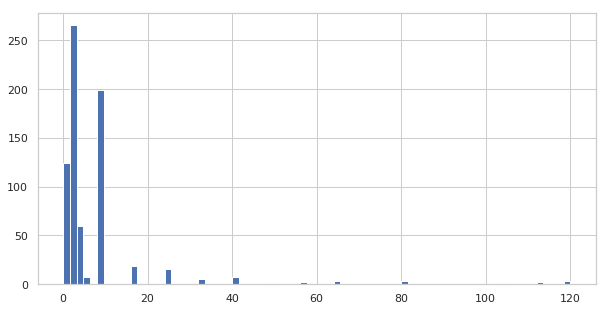

In [144]:
#Univariate Analysis of Outcome Variable
g = plt.figure(figsize=(10,5))
plt.hist(df['Absenteeism time in hours'].dropna(), bins=75)
plt.show()


In [145]:
df['Absenteeism time in hours'].describe()

count    718.000000
mean       6.977716
std       13.476962
min        0.000000
25%        2.000000
50%        3.000000
75%        8.000000
max      120.000000
Name: Absenteeism time in hours, dtype: float64

Absenteeism is the outcome variable. This analysis could be used to:
    1. Predict the level of absenteeism for a given employee.
    2. Gain insight for how to reduce absenteeism.

It is necessary to examine the distribution of absenteeism. most of the data points are clustered below 10 hours.

There is quite a bit of variance in absenteeism. Now we will begin creating some categorical variables from the some of the continuous variables to get a better sense of what data to analyze.

In [146]:
#Create categorical variables from continuous variables
#Create categories for Hit Target

def label_hit (row):
    if row['Hit target'] <= 91:
        return 3
    if row['Hit target'] <= 95:
        return 2
    if row['Hit target'] > 95:
        return 1
    
df['ht_grp'] = df.apply(lambda row: label_hit (row), axis=1)

#Create age categories
def label_age (row):
    if row['Age'] <= 35:
        return 1
    if row['Age'] <= 45:
        return 2
    if row['Age'] > 45:
        return 3
    
df['age_grp'] = df.apply(lambda row: label_age (row), axis=1)


#separate absenteeism into 4 categories.
def label_absent (row):
    if row['Absenteeism time in hours'] <= 6:
        return 1
    if row['Absenteeism time in hours'] <= 8:
        return 2
    if row['Absenteeism time in hours'] <= 20:
        return 3
    if row['Absenteeism time in hours'] > 20:
        return 4
    
df['absent'] = df.apply (lambda row: label_absent (row),axis=1)


#Create categories for Hit Target

print(df[['absent','age_grp','ht_grp']].head())



   absent  age_grp  ht_grp
0     1.0      1.0     1.0
1     1.0      3.0     1.0
2     1.0      2.0     1.0
3     1.0      2.0     1.0
4     1.0      1.0     1.0


Using these new variables, We can start to look at the data by the groups that have been created.

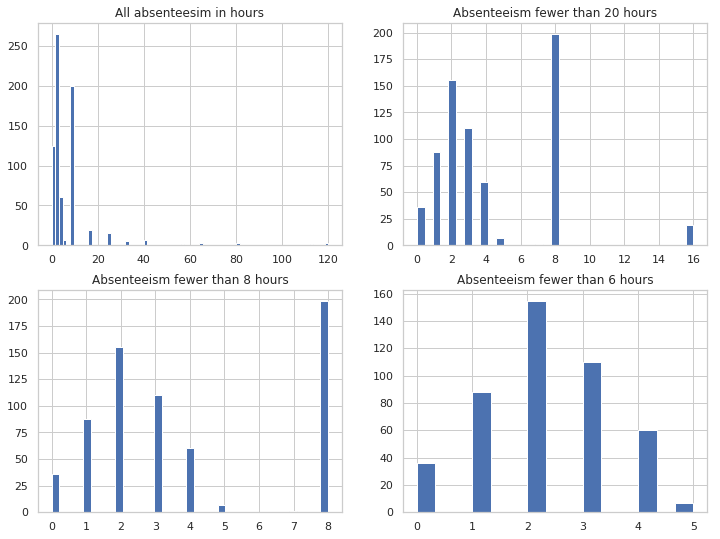

In [147]:
fig = plt.figure(figsize=(12,9))


fig.add_subplot(221)
plt.hist(df.loc[df['absent']<=4]['Absenteeism time in hours'].dropna(),bins=75)
plt.title('All absenteesim in hours')

fig.add_subplot(222)
plt.hist(df.loc[df['absent']<=3]['Absenteeism time in hours'].dropna(), bins=35)
plt.title("Absenteeism fewer than 20 hours")

fig.add_subplot(223)
plt.hist(df.loc[df['absent']<=2]['Absenteeism time in hours'].dropna(),bins=35)
plt.title("Absenteeism fewer than 8 hours")

fig.add_subplot(224)
plt.hist(df.loc[df['absent']==1]['Absenteeism time in hours'], bins=15)
plt.title('Absenteeism fewer than 6 hours')

plt.show()

In [148]:
a=df.loc[df['Absenteeism time in hours']<=8].shape[0]/len(df['Absenteeism time in hours'])
b=df.loc[df['Absenteeism time in hours']==8].shape[0]/len(df.ID)
print("Percent of workers with 'absent hours <= 8' = {0:.2f}%".format(a*100))
print("Percent of workers with 'absent hours = 8' = {0:.2f}%".format(b*100))

Percent of workers with 'absent hours <= 8' = 88.65%
Percent of workers with 'absent hours = 8' = 26.89%


In [149]:
#ttests for absent group 1(less than 6 hours absent) vs 2() (88% of the data)
for col in df[df.columns[5:]]:
    print(col)
    print(stats.ttest_ind(
        df[df['absent']==1][col].dropna(),
        df[df['absent']==2][col].dropna()))

Transportation expense
Ttest_indResult(statistic=-6.654832675736526, pvalue=6.037365722303812e-11)
Distance from Residence to Work
Ttest_indResult(statistic=0.27295532034925835, pvalue=0.7849741239408178)
Service time
Ttest_indResult(statistic=2.026883400449278, pvalue=0.04308140268285858)
Age
Ttest_indResult(statistic=0.7859097392735118, pvalue=0.4322058845205251)
Hit target
Ttest_indResult(statistic=-0.6620395320782188, pvalue=0.5081812509068684)
Disciplinary failure
Ttest_indResult(statistic=3.859079548096918, pvalue=0.00012518827637255308)
Education
Ttest_indResult(statistic=-0.12663772268697163, pvalue=0.8992666051029853)
Son
Ttest_indResult(statistic=-4.0600965787690875, pvalue=5.504269642100402e-05)
Social drinker
Ttest_indResult(statistic=-1.6684738233637764, pvalue=0.09570181028004218)
Social smoker
Ttest_indResult(statistic=-1.9902713568923618, pvalue=0.046978821041588854)
Pet
Ttest_indResult(statistic=-2.767086922806338, pvalue=0.005816372513200185)
Weight
Ttest_indResult(st

There appear to be significant differences for those absent fewer than 6 hours and those absent 8 hours (p-value<0.05):
    1. Service time
    2. Disciplanry failure
    3. Social Smoker
    4. Pet
    5. Age group
 Note that there were not significant differences between Age and the absent group. However with our newly created feature, the differences are significant.

After visualizing the distribution of Absenteeism. A decision about which data to use should be made.
Ideally, we would like to take the normal looking "absenteeism fewer than 6 hours', however 27% of our data points are clustered at 8 hours. 

In [150]:
#As we split "Hit target" into categories, we will use categories 1 and 2 (90-95%, 95-100% and ) 
#as a categorical variable, also use 'absent <=1'to include those with 8 or fewer absent hours

dfplot = df.loc[((df['ht_grp']==1)|(df['ht_grp']==2))&(df['absent']<=1)]


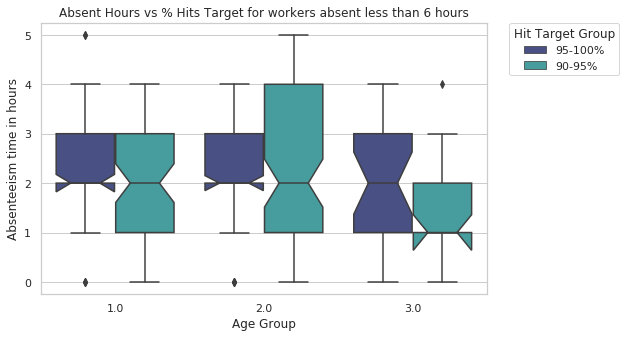

In [151]:
#create a plot using the new variables created
sns.set(style='whitegrid')
plt.figure(figsize=(8,5))
g = sns.boxplot(x='age_grp', 
                y='Absenteeism time in hours',
                hue='ht_grp',
                notch=True,
                data=dfplot,
                palette='mako')
plt.xlabel('Age Group')
handles, _ = g.get_legend_handles_labels()
plt.legend(handles, ["95-100%", "90-95%","Less than 90%"], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title='Hit Target Group')
plt.title('Absent Hours vs % Hits Target for workers absent less than 6 hours')
plt.show()

The results in this graph are somewhat counterintuitive. Overall it seems that for each age group, those who hit their work target only 90-95% are less likely to be absent. It could be useful to see if there are significant differences in age group. For this, minor manipulation of the data is necessary.

In [152]:
#Selecting columns of interest for those in absent 1 category
df1 = df.loc[(df['absent']<=1)]
df1 = df1[df1.columns[5:]].dropna()
list(df1)


['Transportation expense',
 'Distance from Residence to Work',
 'Service time',
 'Age',
 'Hit target',
 'Disciplinary failure',
 'Education',
 'Son',
 'Social drinker',
 'Social smoker',
 'Pet',
 'Weight',
 'Height',
 'Body mass index',
 'Absenteeism time in hours',
 'ht_grp',
 'age_grp',
 'absent']

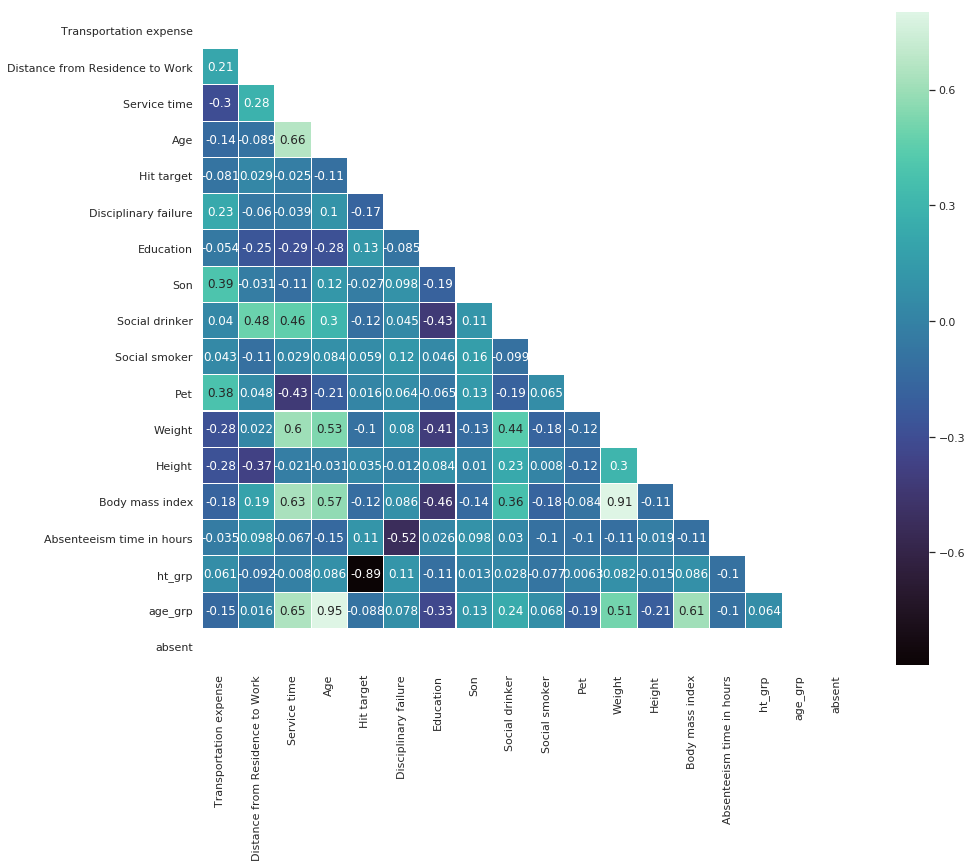

In [153]:
#create heat map to show correlation between variables.
corrmat = df1.corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
    
with sns.axes_style('white'):    
    ax = plt.subplots(figsize=(15,12))

    sns.heatmap(corrmat,
            vmax=.8, 
            cmap="mako",
            annot=True,
            linewidth=.05,
            square=True,
            mask=mask)


plt.show()

Some of the variables seem to be redundant. Variable like 'age' and 'service time' may be able to be combined. Service time also correlates well with weight and BMI and age. It makes sense that if a variable correlates with BMI it would correlate well with weight as BMI is partly a function of weight.
For academic purposes, lets try to combine these variables and see how much variance we can explain with the new feature.


In [154]:
features = pd.DataFrame()
means = df1[['Service time','Body mass index','Weight','Age']].mean(axis=0)
stds = df1[['Service time','Body mass index','Weight','Age']].std(axis=0)
features['S_B_W_A'] = ((df1[['Service time','Body mass index','Weight','Age']] - means) / stds).mean(axis=1)
plot = df1.loc[:,['Service time','Body mass index','Weight','Age']]
plot['S_B_W_A'] = features['S_B_W_A']
corrmat4 = plot.corr()
print(corrmat4)

                 Service time  Body mass index    Weight       Age   S_B_W_A
Service time         1.000000         0.633100  0.603654  0.664913  0.843612
Body mass index      0.633100         1.000000  0.911911  0.569195  0.905404
Weight               0.603654         0.911911  1.000000  0.532568  0.886194
Age                  0.664913         0.569195  0.532568  1.000000  0.804366
S_B_W_A              0.843612         0.905404  0.886194  0.804366  1.000000


For workers in absent group 1 (less than 6 absent hours) this new composite correlates well with the individual variables.

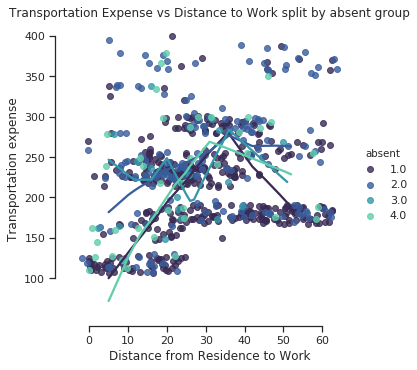

In [155]:
#plot 2 continuous variables

sns.set(style="ticks")
sns.lmplot(x='Distance from Residence to Work',
            y='Transportation expense',
            hue='absent',
            x_jitter=12,
            y_jitter=12,            
            data=df.loc[df['age_grp']<=3].dropna(),
            palette="mako",
            lowess=True
          )
        
sns.despine(offset=12, trim=True)
plt.title("Transportation Expense vs Distance to Work split by absent group")

plt.show()

This graph shows quite a bit of variance and doesnt help much in explaining absenteeism however the clusters of data could represent different groups. Perhaps the clusters come from the same area? and these groups could be examined more closely to see if there are significant differneces between them.

In [156]:
#test for differences by Age groups
print('ttests for Age Groups\n')

print('ttests between 25-35 year olds and 35-45 year olds\n')
for col in df1:
    print(col)
    print(stats.ttest_ind(
        df1[df1['age_grp']==1][col].dropna(),
        df1[df1['age_grp']==2][col].dropna(),        
    ))
print('\nttests between 35-45 year olds and over 45 year olds\n\n')
for col in df1:
    print(col)
    print(stats.ttest_ind(
        df1[df1['age_grp']==2][col].dropna(),
        df1[df1['age_grp']==3][col].dropna(),        
    ))
print('\nttests between 25-35 year olds and over 45 year olds\n\n')
for col in df1:
    print(col)
    print(stats.ttest_ind(
        df1[df1['age_grp']==1][col].dropna(),
        df1[df1['age_grp']==3][col].dropna(),    
    ))

ttests for Age Groups

ttests between 25-35 year olds and 35-45 year olds

Transportation expense
Ttest_indResult(statistic=2.025872406721932, pvalue=0.043529640844478266)
Distance from Residence to Work
Ttest_indResult(statistic=-6.211139951020196, pvalue=1.4797435183778368e-09)
Service time
Ttest_indResult(statistic=-17.04587172296743, pvalue=5.821153232211513e-48)
Age
Ttest_indResult(statistic=-42.31556813031795, pvalue=2.5216185052082465e-140)
Hit target
Ttest_indResult(statistic=1.9229223577657726, pvalue=0.05529404411042972)
Disciplinary failure
Ttest_indResult(statistic=0.0340013293634505, pvalue=0.9728953081652951)
Education
Ttest_indResult(statistic=5.948467666432676, pvalue=6.517451342360046e-09)
Son
Ttest_indResult(statistic=-0.16512184203752783, pvalue=0.868942599537276)
Social drinker
Ttest_indResult(statistic=-10.261755237172892, pvalue=8.546165581790031e-22)
Social smoker
Ttest_indResult(statistic=-2.21653322596199, pvalue=0.02729195858520629)
Pet
Ttest_indResult(statist

In the ttests, some significant differences in a few of the variables are present between the age groups.

/root/.pyenv/versions/jupyter3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


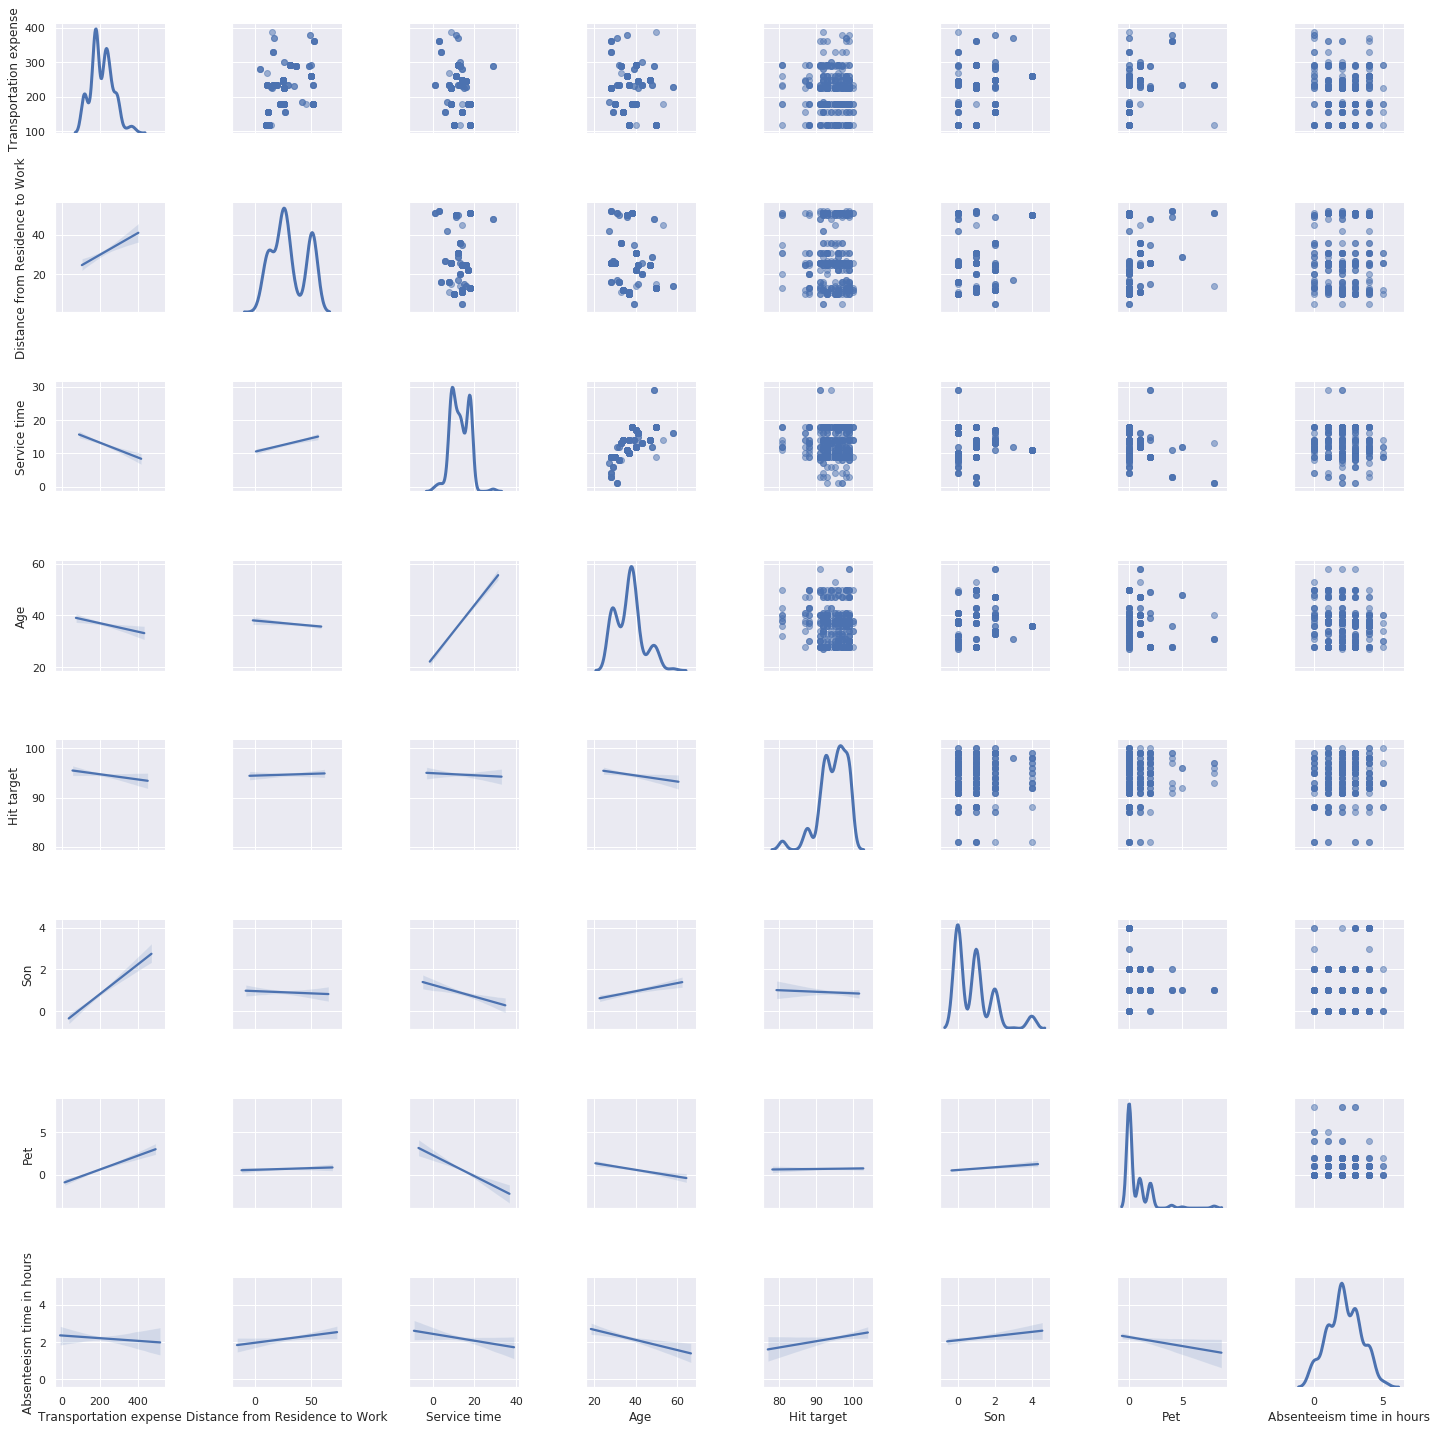

In [157]:
sns.set_style('darkgrid')
g = sns.PairGrid(df2.dropna(), diag_sharey=False)

g.map_upper(plt.scatter, alpha=.5)

g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

g.map_diag(sns.kdeplot, lw=3)
plt.show()

The pairplot is helpful for visualizing the relationships between pairs of variables. For example, it is no surprise that 'Distance from residence to work' and 'Tranportation Expense would have a positive relationship. The same is true for 'Age' and 'Service Years'.  


Overall, this data set would not make for a good model. The distribution of "Absenteeism time in hours" is too segmented, with a range of 0-120 hours and 27% of the data points at exactly 8 hours, 61% below that and the rest 12% distributed from 20 to 120 hours. 
New features added
1. Age group
2. Hit target group
3. Absent group
4. Combine Weight, BMI, service time and age
Others to impove the data
5. Gender
6. Department
7. Marital status
8. Total working years
9. Hours worked per day
